<h1><center>SUMMER INTERNSHIP PROJECT</center></h1>
<h2><center>Title - Pneumonia Diagnosis Using Chest Cavity X-ray images</center></h2>
<h3><center>Nipul Agarwal</center></h3>
<h3><center>(2K18/EP/054)</center></h3>

### Importing Libraries

In [1]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
print(os.listdir("chest_xray\chest_xray"))

['.DS_Store', 'test', 'train', 'val']


In [3]:
print(os.listdir("chest_xray/train/"))

['NORMAL', 'PNEUMONIA']


In [4]:
TRAIN_DIR = "chest_xray/train/"
TEST_DIR =  "chest_xray/test/"
VAL_DIR = "chest_xray/val/"

In [5]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        # First Step of Preprocessing - Labelling of data
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                # Next step of preprocessing - Resizing the image to (64,64,3)
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = cv2.resize(img, (64, 64))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [6]:
TRAIN_DIR
X_train,y_train = get_data(TRAIN_DIR)

100%|█████████████████████████████████████████████████████████████████████████████| 3875/3875 [00:37<00:00, 104.43it/s]


In [7]:
X_test , y_test = get_data(TEST_DIR)

100%|███████████████████████████████████████████████████████████████████████████████| 390/390 [00:03<00:00, 120.47it/s]


In [8]:
X_val , Y_val = get_data(VAL_DIR)

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 110.48it/s]


In [9]:
print(X_train.shape,'\n',X_test.shape)

(5216, 64, 64, 3) 
 (624, 64, 64, 3)


In [10]:
print(y_train.shape,'\n',y_test.shape)

(5216,) 
 (624,)


In [11]:
print(y_train.shape,'\n',y_test.shape)
y_test

(5216,) 
 (624,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")

(Left) - No Pneumonia Vs (Right) - Pneumonia
---------------------------------------------


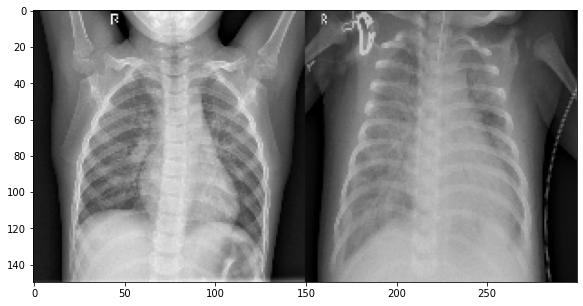

(Left) - No Pneumonia Vs (Right) - Pneumonia
---------------------------------------------


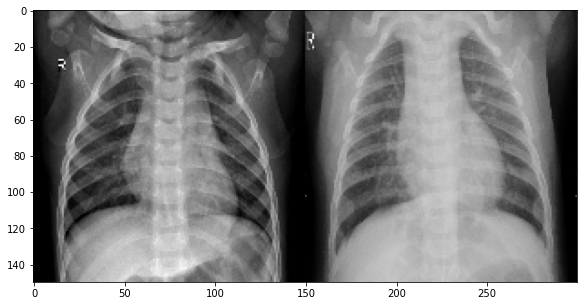

(Left) - No Pneumonia Vs (Right) - Pneumonia
---------------------------------------------


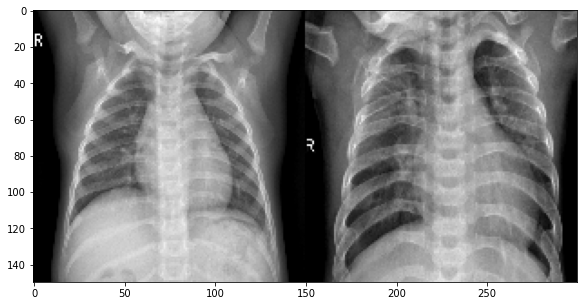

In [13]:

def plotter(i):
    
    imagep1 = cv2.imread(TRAIN_DIR+"PNEUMONIA/"+Pimages[i])
    imagep1 = cv2.resize(imagep1, (150, 150))
    imagen1 = cv2.imread(TRAIN_DIR+"NORMAL/"+Nimages[i])
    imagen1 = cv2.resize(imagen1, (150, 150))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No Pneumonia Vs (Right) - Pneumonia")
    print("---------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,3):
    plotter(i)

In [14]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=1, verbose=1)

Using TensorFlow backend.


In [15]:
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [16]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [17]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D((2,2)))

classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D((2,2)))

classifier.add(Flatten())

classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

print(classifier.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [18]:
batch_size = 256
epochs = 6

In [19]:
history = classifier.fit(X_train, y_train, validation_data = (X_val , Y_val) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)

Train on 5216 samples, validate on 16 samples
Epoch 1/6
5216/5216 [==============================] - 14s 3ms/step - loss: 3.4353 - accuracy: 0.8765 - val_loss: 0.4008 - val_accuracy: 0.8125
Epoch 2/6
  32/5216 [..............................] - ETA: 14s - loss: 0.1084 - accuracy: 0.9375

C:\Users\Nipul\Anaconda3\envs\tensorflow\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
C:\Users\Nipul\Anaconda3\envs\tensorflow\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


5216/5216 [==============================] - 15s 3ms/step - loss: 0.1596 - accuracy: 0.9411 - val_loss: 0.6908 - val_accuracy: 0.6875
Epoch 3/6
5216/5216 [==============================] - 16s 3ms/step - loss: 0.1147 - accuracy: 0.9588 - val_loss: 0.5277 - val_accuracy: 0.8125
Epoch 4/6
5216/5216 [==============================] - 15s 3ms/step - loss: 0.0953 - accuracy: 0.9661 - val_loss: 0.3464 - val_accuracy: 0.8125
Epoch 5/6
5216/5216 [==============================] - 18s 3ms/step - loss: 0.0746 - accuracy: 0.9720 - val_loss: 0.7119 - val_accuracy: 0.7500
Epoch 6/6
5216/5216 [==============================] - 18s 3ms/step - loss: 0.0573 - accuracy: 0.9787 - val_loss: 0.4636 - val_accuracy: 0.8125


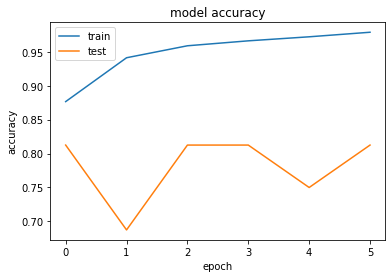

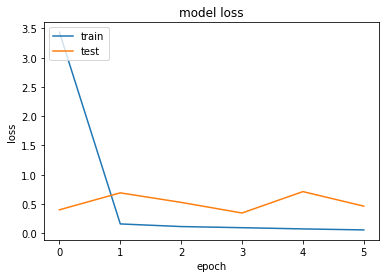

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.figure()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.figure()
plt.show()


In [21]:
from sklearn.metrics import confusion_matrix
pred = classifier.predict(X_test)
pred

array([[9.90963697e-01],
       [9.95850086e-01],
       [9.84172463e-01],
       [5.71110785e-01],
       [9.98163402e-01],
       [7.91138470e-01],
       [2.11516008e-01],
       [8.06040108e-01],
       [9.99643087e-01],
       [5.05608857e-01],
       [2.93354541e-01],
       [9.99992847e-01],
       [9.96052742e-01],
       [4.17326361e-01],
       [9.98236656e-01],
       [3.59143734e-01],
       [2.91986287e-01],
       [8.02554309e-01],
       [2.32182637e-01],
       [5.97861707e-01],
       [9.97656822e-01],
       [8.75064015e-01],
       [9.83906209e-01],
       [8.99964213e-01],
       [9.86448705e-01],
       [1.63957775e-01],
       [8.20022821e-01],
       [9.99716103e-01],
       [9.99118865e-01],
       [2.37896353e-01],
       [9.99275148e-01],
       [1.18733674e-01],
       [7.55301714e-01],
       [9.15048242e-01],
       [9.79493558e-01],
       [4.38889891e-01],
       [5.45068309e-02],
       [7.93482587e-02],
       [9.83681917e-01],
       [1.33952290e-01],


In [22]:
pred_ = []
for i in range(624): 
 pred_.insert(i,1 if pred[i] >= 9e-01 else 0)


In [23]:
#pred_ =pred_.resize(624,)
predn = np.array(pred_)
predn.reshape(624,)
(predn==y_test).sum()


490

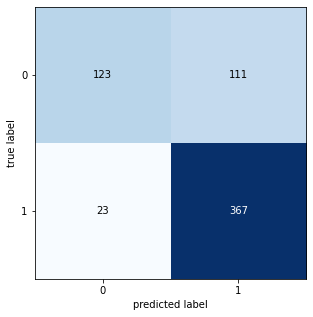

In [24]:
CM = confusion_matrix(y_test, pred_)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [25]:
metrics.f1_score(y_test,predn)

0.8456221198156681

In [26]:
metrics.precision_score(y_test,predn)

0.7677824267782427

In [27]:
metrics.recall_score(y_test,predn)

0.941025641025641

#### Here , Recall is most significant quantity even more than accuracy and precision.

Since we are having unequal number of people in both the classes , therefore we can't take accuracy as an alone metric to calculate model efficieny .

#### Precision = True Positive / (True Positive + False Positive)
#### Recall = True Positive / (True Positive +  False Negative)

Also precision can't be taken as alone metric and has less significance than recall in this particular dataset because we have to minimize false negative and that is in the denominator and thus finally increasing 'Recall' .
False negative has to be intuitively minimized because falsely diagnosing a patient of pneumonia as not having a pneumonia is a much larger deal than falsely diagnosing a healthy person as a pneumonia patient which is our major concern . That is why we are making this model . To reduce the mistakes done by doctors accidentally .¶